In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text
from soccerplots.radar_chart import Radar

import highlight_text

In [79]:
Player_1 = 'Younes Belhanda 2017/2018'
Player_2 = 'Younes Belhanda 2018/2019'
Color_1 = 'white'
Color_2 = 'red'

In [80]:
df = pd.read_csv('Belhanda Galatasaray Stats.csv')
df.columns = df.columns.str.replace(' ', '') 
Keep1 = pd.unique(df['Player'])
Keep1[:] = Keep1[::-1]
Keep1 = pd.DataFrame(Keep1, columns = ['Player'])
df = df.groupby('Season').sum().reset_index()
Keep2 = df[['Season','Minutes']]

In [81]:
df = df.iloc[:, 2:].divide(df.iloc[:,1], axis = 'rows')
df = df.iloc[:,:].multiply(90)
Keep2 = pd.concat([Keep1, Keep2], axis = 1)
df = pd.concat([Keep2, df], axis = 1)
df

,Player,Season,Minutes,TacklesSuccessful,TacklesUnsuccessful,TacklesTotal,Interceptions,FoulsWon,FoulsCommited,YellowCards,...,AerialsLost,PassesTotal,PassesSuccessfulLong,PassesUnsuccessfulLong,PassesSuccessfulShort,PassesUnsuccessfulShort,KeyPassesTotal,KeyPassesLong,KeyPassesShort,Assists
0,Younes Belhanda 2017/2018,2017/2018,2445,1.803681,1.582822,3.386503,1.067485,1.730061,1.840491,0.147239,...,0.588957,56.061350,1.987730,1.325153,42.993865,9.754601,2.981595,0.883436,2.098160,0.294479
1,Younes Belhanda 2018/2019,2018/2019,2363,1.713923,1.409226,3.123149,0.685569,1.599661,1.409226,0.342785,...,0.914092,51.646212,1.523487,1.066441,40.981803,8.074482,2.704190,0.647482,2.056708,0.228523
2,Younes Belhanda 2019/2020,2019/2020,2069,1.304978,0.826486,2.131464,0.608990,1.130981,1.435476,0.347994,...,0.826486,54.156597,1.739971,0.782987,44.630256,7.003383,1.522475,0.000000,1.522475,0.086999
3,Younes Belhanda 2020/2021,2020/2021,1411,1.403260,1.084337,2.487597,0.637845,1.084337,0.892984,0.191354,...,0.892984,49.688164,2.423813,0.701630,39.673990,6.888731,1.722183,0.255138,1.467045,0.191354


In [82]:
df['TackleSuccess%'] = 100*df['TacklesSuccessful'] / df['TacklesTotal']

df['AerialSuccess%'] = 100*df['AerialsWon'] / df['AerialsTotal']

df['BlocksTotal'] = df['BlockedShots'] + df['BlockedCrosses'] + df['BlockedPasses']

df['Tackles&Interceptions'] = df['TacklesSuccessful'] + df['Interceptions']

#df['DefensiveActionsSuccessful'] = df['TacklesSuccessful'] + df['Interceptions'] + df['Clearances'] + df['AerialsWon'] + df['BlocksTotal'] 

#df['DefensiveActionsUnsuccessful'] = df['TacklesUnsuccessful'] + df['FoulsCommited'] + df['AerialsLost']

df['DribbleSuccess%'] = 100*df['DribblesSuccessful'] / df['DribblesTotal']

df['Bookings'] = df['YellowCards'] + df['RedCards']

df['GoalContributions'] = df['Goals'] + df['Assists']

#df['PosessionLosses'] = df['Offsides'] + df['DribblesUnsuccessful'] + df['TouchesUnsuccessful'] + df['Dispossessed'] + df['PassesUnsuccessfulShort'] + df['PassesUnsuccessfulLong']

df['Turnovers'] = df['TouchesUnsuccessful'] + df['Dispossessed']

df['PassSuccessShort%'] = 100*df['PassesSuccessfulShort'] / (df['PassesSuccessfulShort'] + df['PassesUnsuccessfulShort'])

df['PassSuccessLong%'] = 100*df['PassesSuccessfulLong'] / (df['PassesSuccessfulLong'] + df['PassesUnsuccessfulLong'])

df['PassesSuccessful'] = df['PassesSuccessfulShort'] + df['PassesSuccessfulLong']

df['PassSuccess%'] = 100*(df['PassesSuccessfulShort'] + df['PassesSuccessfulLong']) / (df['PassesSuccessfulShort'] + df['PassesSuccessfulLong'] + df['PassesUnsuccessfulShort'] + df['PassesUnsuccessfulLong'])


In [83]:
#print(df.columns.tolist())


In [84]:
df = df[(df['Player']== Player_1) | (df['Player']== Player_2)].reset_index(drop=True)
#df = df[['Player','GoalContributions','ShotsTotal', 'DribblesSuccessful', 'DribbleSuccess%','PassesSuccessful', 'PassSuccess%','KeyPassesTotal', 'FoulsWon','Tackles&Interceptions','Turnovers','Bookings']]
df = df[['Player','GoalContributions','ShotsTotal','KeyPassesTotal','PassesSuccessful','PassSuccess%','DribblesSuccessful', 'DribbleSuccess%','FoulsWon','Tackles&Interceptions','AerialsWon','Bookings']]
df

,Player,GoalContributions,ShotsTotal,KeyPassesTotal,PassesSuccessful,PassSuccess%,DribblesSuccessful,DribbleSuccess%,FoulsWon,Tackles&Interceptions,AerialsWon,Bookings
0,Younes Belhanda 2017/2018,0.404908,1.472393,2.981595,44.981595,80.236376,2.503067,70.833333,1.730061,2.871166,0.699387,0.220859
1,Younes Belhanda 2018/2019,0.380872,1.675836,2.704190,42.505290,82.300885,1.637749,59.722222,1.599661,2.399492,0.952179,0.380872


In [85]:
df.columns = ['Player','Goal Contributions','Shots','Key Passes','Successful Passes','Pass Success %','Successful Dribbles', 'Dribble Success %','Fouls Won','Tck + Int','Aerials Won','Bookings']

In [86]:
params = list(df.columns)
params = params[1:]

In [87]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*0.25) # 0.25 katı kadar pay bırakacak
    #a = 0

    b = max(df[params][x])
    b = b + (b*0.10)
    
    ranges.append((a,b)) #ranges liste bu aralıkları append eder
    
for x in range(len(df['Player'])):
    if df['Player'][x] == Player_1:
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == Player_2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [88]:
delim = ' '
sep = 2

temp = Player_1.split(delim)
Player_1 = delim.join(temp[:sep]), delim.join(temp[sep:])

temp = Player_2.split(delim)
Player_2 = delim.join(temp[:sep]), delim.join(temp[sep:])


In [89]:
#title 

title = dict(
    title_name= Player_1[0],
    title_color = Color_1,
    subtitle_name = Player_1[1],
    subtitle_color = Color_1,
    title_name_2= Player_2[0],
    title_color_2 = Color_2,
    subtitle_name_2 = Player_2[1],
    subtitle_color_2 = Color_2,
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@msuatgunerli - all stats per90, data via WhoScored'

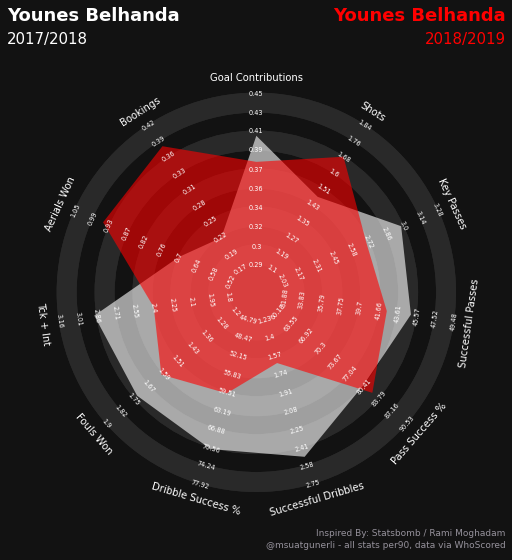

In [90]:
radar = Radar(background_color="#121212", patch_color="#292929", label_color="#FFFFFF", range_color="#FFFFFF")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=[Color_1, Color_2],
                         alphas=[0.6,0.6],title=title,endnote=endnote,
                         compare=True)